In [18]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

import channels as ch
import tomography as tmg

# prepare channel
p = 0.1
channel = lambda rho: ch.depolarize_channel(rho, p)
# channel = lambda rho: ch.gate_action(rho, 'X')
C_true = ch.channel_to_choi(channel)


# Experimental Setup. We will measure and prepare states in tetrahedron axis
PREPARE_CASE = 'tetr'
MEASURE_CASE = 'tetr'

PROTOCOL = np.matrix(tmg.protocol_QPT(prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE))/4
n = 1000

# collect experimental data
frequencies_LI = tmg.measurements(channel, prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE, N = n).reshape(-1,1)/4
frequencies_ML = frequencies_LI
# frequencies_LI = tmg.current_probability(C_true, PROTOCOL)
# frequencies_ML = tmg.current_probability(C_true, PROTOCOL)

In [19]:
# recover C_est via linear inversion
C_est_LI = ((PROTOCOL.H @ PROTOCOL).I @ PROTOCOL.H) @ frequencies_LI
C_est_LI = tmg.CPTP_proj(C_est_LI).reshape(4,4)




## recover C_est via gradient descend
C_0 = np.array([[1,0,0,1],
                [0,0,0,0],
                [0,0,0,0],
                [1,0,0,1]])
# C_0 = np.eye(4)/4
C_list = tmg.grad_descent(frequencies_ML.reshape(-1,1), PROTOCOL, C_0)
C_est_ML = C_list[-1]
C_est_ML = C_est_ML.reshape(4,4)

current_cost =  [[2.67884132]]
alpha =  2.0
current_cost =  [[2.67503436]]
alpha =  2.0
current_cost =  [[2.67425488]]
alpha =  2.0
current_cost =  [[2.67240645]]
alpha =  2.842170943040401e-14
End of algorithm. next_cost =  [[2.67240645]]


In [20]:
# C_est_ML = C_list[-14000]
# C_est_ML = C_est_ML.reshape(4,4)

print('True channel:\n', np.around(C_true, decimals=3),   '\n')
print('LI recovery:\n',  np.around(C_est_LI, decimals=3), '\n')
print('ML recovery:\n',  np.around(C_est_ML, decimals=3), '\n')

print('Trace distance:\n', tmg.tr_dist(C_true, C_est_LI))
print(tmg.tr_dist(C_true, C_est_ML), '\n')

print('HS distance:\n', tmg.hs_dist(C_true, C_est_LI))
print(tmg.hs_dist(C_true, C_est_ML))

True channel:
 [[0.933+0.j 0.   +0.j 0.   +0.j 0.867+0.j]
 [0.   +0.j 0.067+0.j 0.   +0.j 0.   +0.j]
 [0.   +0.j 0.   +0.j 0.067+0.j 0.   +0.j]
 [0.867+0.j 0.   +0.j 0.   +0.j 0.933+0.j]] 

LI recovery:
 [[ 0.904+0.j     0.006-0.045j -0.034+0.034j  0.826-0.009j]
 [ 0.006+0.045j  0.096+0.j     0.016-0.039j  0.034-0.034j]
 [-0.034-0.034j  0.016+0.039j  0.096+0.j    -0.006+0.045j]
 [ 0.826+0.009j  0.034+0.034j -0.006-0.045j  0.904+0.j   ]] 

ML recovery:
 [[ 0.929+0.j    -0.011-0.035j -0.028+0.022j  0.855-0.008j]
 [-0.011+0.035j  0.071-0.j     0.02 -0.024j  0.027-0.022j]
 [-0.028-0.022j  0.02 +0.024j  0.095-0.j    -0.034+0.031j]
 [ 0.855+0.008j  0.027+0.022j -0.034-0.031j  0.905+0.j   ]] 

Trace distance:
 0.1440471794866492
0.11112051980084516 

HS distance:
 0.027882524779923153
0.01593928454586087


In [15]:
%matplotlib inline
import seaborn as sns

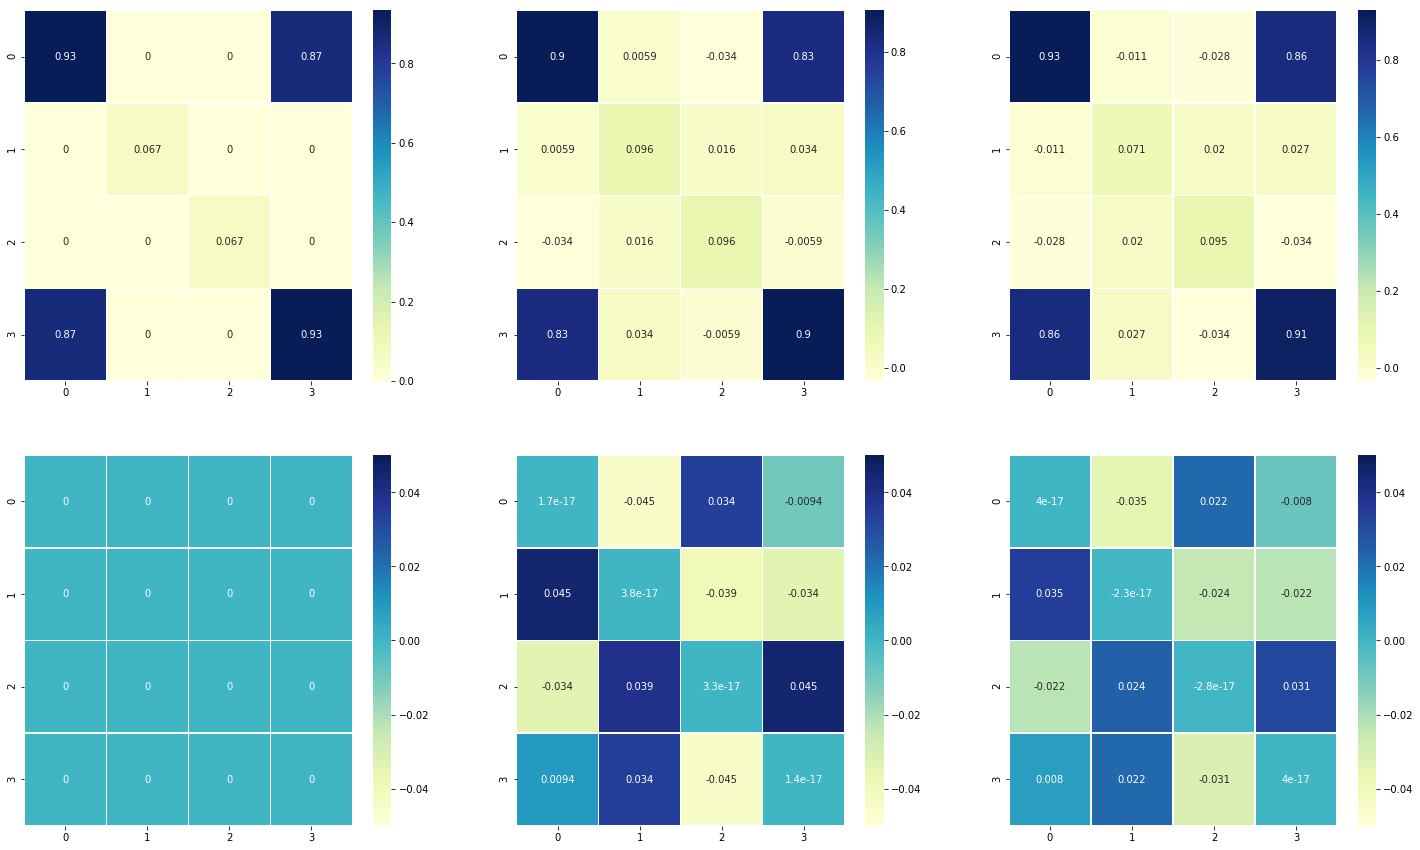

In [21]:
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)


# ax1.set_title('C_true real part')
# ax2.set_title('C_est_LI real part')
# ax3.set_title('C_est_ML real part')

# ax4.set_title('C_true')


sns.heatmap(np.real(C_true),   annot=True, linewidths=.5, cmap="YlGnBu", ax=ax1)#, vmin=-0.,  vmax = 1)
sns.heatmap(np.real(C_est_LI), annot=True, linewidths=.5, cmap="YlGnBu", ax=ax2)#, vmin=-0.,  vmax = 1,)
sns.heatmap(np.real(C_est_ML), annot=True, linewidths=.5, cmap="YlGnBu", ax=ax3)#, vmin=-0.,  vmax = 1)

sns.heatmap(np.imag(C_true),   annot=True, linewidths=.5, cmap="YlGnBu", ax=ax4, vmin=-0.05, vmax = 0.05)
sns.heatmap(np.imag(C_est_LI), annot=True, linewidths=.5, cmap="YlGnBu", ax=ax5, vmin=-0.05, vmax = 0.05)
sns.heatmap(np.imag(C_est_ML), annot=True, linewidths=.5, cmap="YlGnBu", ax=ax6, vmin=-0.05, vmax = 0.05)

# plt.savefig('recovered_id_channel_matr.pdf', format='pdf', dpi=500)
plt.show()

**The same matrix recovery but for initial guess C_0**

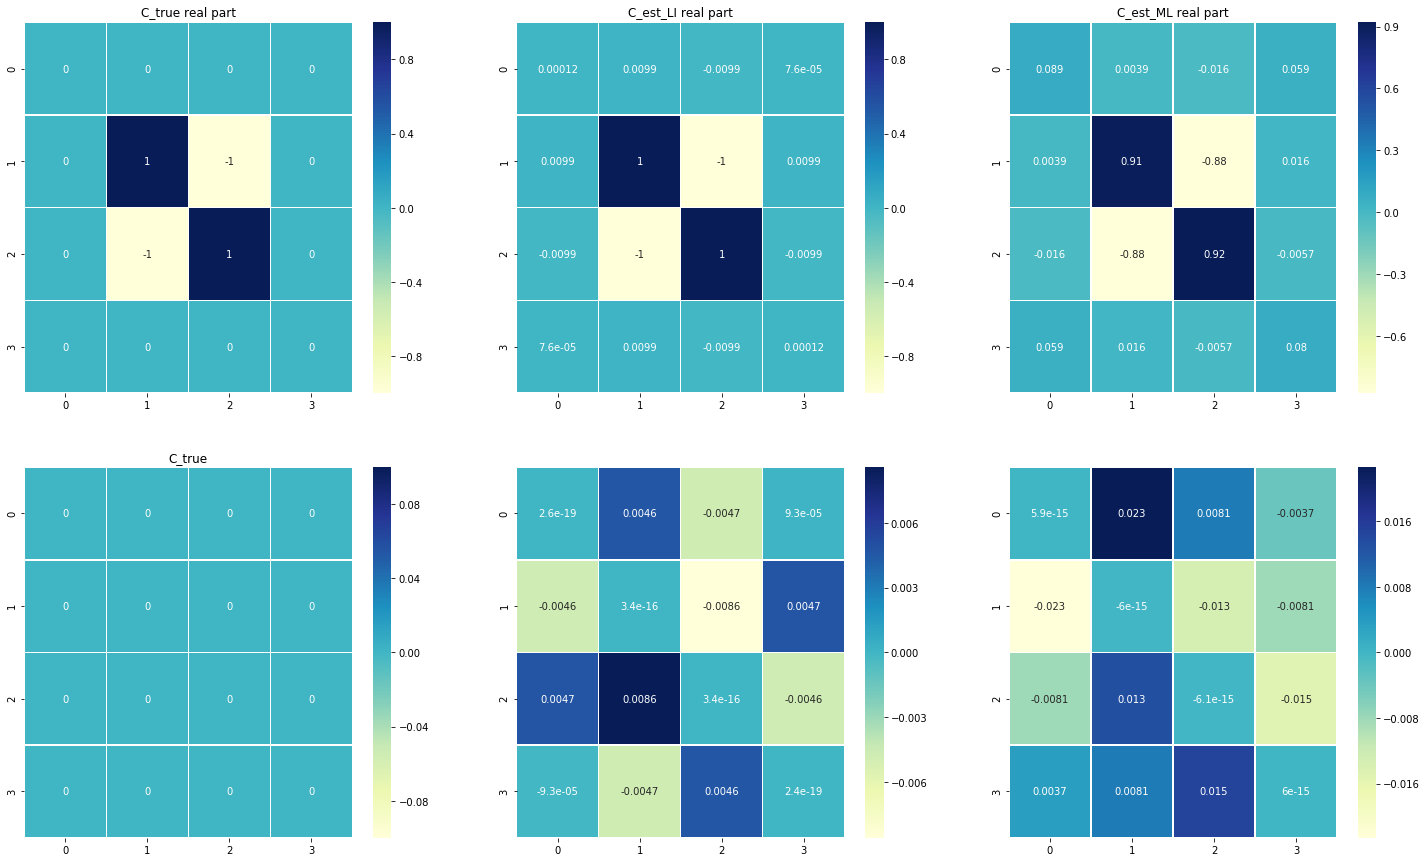

In [9]:
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)


ax1.set_title('C_true real part')
ax2.set_title('C_est_LI real part')
ax3.set_title('C_est_ML real part')

ax4.set_title('C_true')


sns.heatmap(np.real(C_true),   annot=True, linewidths=.5, cmap="YlGnBu", ax=ax1)#, vmin=-0.,  vmax = 1)
sns.heatmap(np.imag(C_true),   annot=True, linewidths=.5, cmap="YlGnBu", ax=ax4)#, vmin=-0.1, vmax = 0.1)
sns.heatmap(np.real(C_est_LI), annot=True, linewidths=.5, cmap="YlGnBu", ax=ax2)#, vmin=-0.,  vmax = 1,)
sns.heatmap(np.imag(C_est_LI), annot=True, linewidths=.5, cmap="YlGnBu", ax=ax5)#, vmin=-0.1, vmax = .1)
sns.heatmap(np.real(C_est_ML), annot=True, linewidths=.5, cmap="YlGnBu", ax=ax3)#, vmin=-0.,  vmax = 1)
sns.heatmap(np.imag(C_est_ML), annot=True, linewidths=.5, cmap="YlGnBu", ax=ax6)#, vmin=-0.1, vmax = .1)

# plt.savefig('recovered_channel_matr.pdf', format='pdf', dpi=500)
plt.show()

In [10]:
prob = tmg.current_probability(C_true, PROTOCOL)
tmg.cost(C_true, frequencies_ML, prob)

matrix([[0.00526251]])

In [3]:
len(C_list)

25001